In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import Library
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
#Melakukan Proses Ekstrak pada file zip
import zipfile
local_zip = "/content/drive/MyDrive/archive_3.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [12]:
#Read CSV and display the data
dataset = pd.read_csv('/content/openweatherdata-denpasar-1990-2020.csv')
display(dataset)

,dt,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,631152000,1990-01-01 00:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,631155600,1990-01-01 01:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,631159200,1990-01-01 02:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,631162800,1990-01-01 03:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,631166400,1990-01-01 04:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264919,1578423600,2020-01-07 19:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,27.00,27.00,27.00,1007.0,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
264920,1578427200,2020-01-07 20:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,27.00,27.00,27.00,1007.0,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
264921,1578430800,2020-01-07 21:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,28.00,28.00,28.00,1007.0,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
264922,1578434400,2020-01-07 22:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,28.00,28.00,28.00,1007.0,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n


In [13]:
#Check data null
dataset.isnull().sum()

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              264924
grnd_level             264924
humidity                    0
wind_speed                  0
wind_deg                    0
rain_1h                248638
rain_3h                248768
rain_6h                228826
rain_12h               264912
rain_24h               258107
rain_today             264924
snow_1h                264924
snow_3h                264924
snow_6h                264924
snow_12h               264924
snow_24h               264924
snow_today             264924
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [14]:
#Drop attribute that not used
dataset = dataset.drop(dataset.columns[[0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],axis=1)
display(dataset.head())

,dt_iso,temp
0,1990-01-01 00:00:00 +0000 UTC,25.82
1,1990-01-01 01:00:00 +0000 UTC,26.20
2,1990-01-01 02:00:00 +0000 UTC,26.45
3,1990-01-01 03:00:00 +0000 UTC,26.80
4,1990-01-01 04:00:00 +0000 UTC,27.04


In [15]:
#Check data is null
dataset.isnull().sum()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264924 entries, 0 to 264923
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   dt_iso  264924 non-null  object 
 1   temp    264924 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.0+ MB


In [16]:
#Rename Attribute dt_iso into date
dataset = dataset.rename(columns={'dt_iso': 'date'})
display(dataset.head())

,date,temp
0,1990-01-01 00:00:00 +0000 UTC,25.82
1,1990-01-01 01:00:00 +0000 UTC,26.20
2,1990-01-01 02:00:00 +0000 UTC,26.45
3,1990-01-01 03:00:00 +0000 UTC,26.80
4,1990-01-01 04:00:00 +0000 UTC,27.04


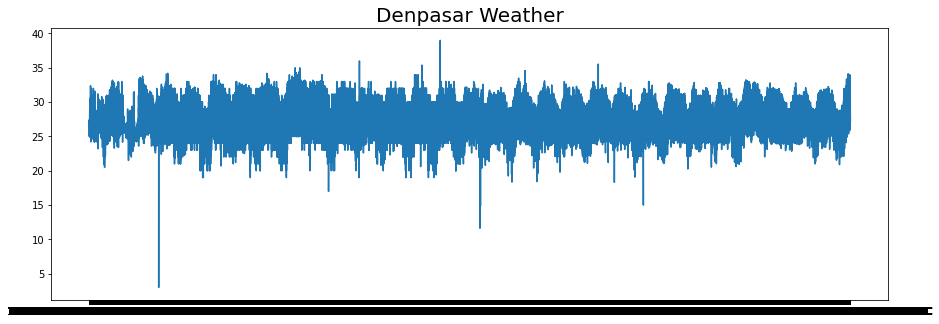

In [17]:
#Plot time series
date = dataset['date'].values
temperature  = dataset['temp'].values
plt.figure(figsize=(15,5))
plt.plot(date, temperature)
plt.title('Denpasar Weather',
          fontsize=20);

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(temperature, date, test_size = 0.2, random_state = 42)
print("X Train= ",len(X_train))
print("X Vaidation= ",len(X_validation))
print("Y train= ",len(y_train))
print("Y Validation= ",len(y_validation))

X Train=  211939
X Vaidation=  52985
Y train=  211939
Y Validation=  52985


In [19]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [21]:
tf.keras.backend.set_floatx('float64')
train_set = windowed_dataset(X_train, window_size=64, batch_size=1024, shuffle_buffer=1000)
validation_set = windowed_dataset(X_validation, window_size=64, batch_size=1024, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"), 
  tf.keras.layers.Dense(1),
])

In [23]:
#Menghitung nilai mae
Mae = (dataset['temp'].max() - dataset['temp'].min()) * 0.1
print("Temp Max= ",dataset['temp'].max())
print("Temp Min= ",dataset['temp'].min())
print("MAE= ",Mae)

Temp Max=  39.0
Temp Min=  3.0
MAE=  3.6


In [24]:
#Callback 10% mae
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<3.6 and logs.get('val_mae')<3.6):
      print("MAE < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [25]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,metrics=["mae"])
trainmodel = model.fit(train_set,epochs=100,validation_data=validation_set,verbose=2,callbacks=[callbacks])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


207/207 - 56s - loss: 26.6847 - mae: 27.1847 - val_loss: 26.5724 - val_mae: 27.0724 - 56s/epoch - 269ms/step
Epoch 2/100
207/207 - 41s - loss: 26.4610 - mae: 26.9610 - val_loss: 26.3477 - val_mae: 26.8477 - 41s/epoch - 197ms/step
Epoch 3/100
207/207 - 46s - loss: 26.2176 - mae: 26.7176 - val_loss: 26.0762 - val_mae: 26.5762 - 46s/epoch - 223ms/step
Epoch 4/100
207/207 - 41s - loss: 25.8757 - mae: 26.3757 - val_loss: 25.6179 - val_mae: 26.1179 - 41s/epoch - 198ms/step
Epoch 5/100
207/207 - 43s - loss: 25.0291 - mae: 25.5291 - val_loss: 23.9770 - val_mae: 24.4770 - 43s/epoch - 207ms/step
Epoch 6/100
207/207 - 45s - loss: 16.4374 - mae: 16.9305 - val_loss: 1.1654 - val_mae: 1.5957 - 45s/epoch - 215ms/step
Epoch 7/100
MAE < 10% skala data
207/207 - 41s - loss: 1.1388 - mae: 1.5672 - val_loss: 1.1435 - val_mae: 1.5714 - 41s/epoch - 198ms/step


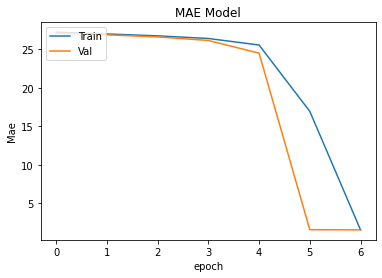

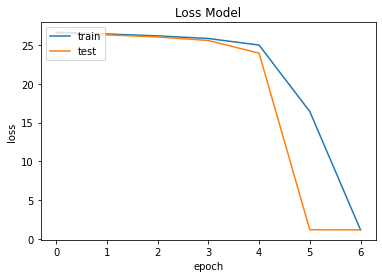

In [26]:
#Plot MAE and Loss
import matplotlib.pyplot as plt
# MAE
plt.plot(trainmodel.history['mae'])
plt.plot(trainmodel.history['val_mae'])
plt.title('MAE Model')
plt.ylabel('Mae')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()  
#Loss
plt.plot(trainmodel.history['loss'])
plt.plot(trainmodel.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()